In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Hypersphere

$n$차원에서의 구를 초구(hypershpere)라고 한다. 반지름이 $r$인 2차권 구의 부피(면적)은 $S_2=\pi r^2$, 3차원은 $S_3=\frac{4}{3} \pi r^3$이다. 이를 확장하여 4차원, 5차원 구의 부피를 몬테카를로 방법을 이용하여 추측해보자. 
* $n$차원 구의 부피는 $S_n = C_n r^n$이다.
* 따라서 반지름이 1인 구를 생각하면 $S_n=C_n$과 같다.
* 몬테카를로 방법을 이용한 2차원 원의 면적 문제를 응용하여 3, 4, 5차원에서 $C_n$의 근사값을 구하여라.

In [4]:
# 3차원 구
def s_circle(n) :
    count = 0
    for i in range(n):
        x,y,z = random.random(),random.random(),random.random()
        if x*x+y*y+z*z<1:
            count +=1
    return 8*count/n
s_circle(100000)

4.2076

In [5]:
# 4차원 구
def s_circle(n) :
    count = 0
    for i in range(n):
        x,y,z,k = random.random(),random.random(),random.random(),random.random()
        if x*x+y*y+z*z+k*k<1:
            count +=1
    return 16*count/n
s_circle(100000)

4.97504

In [6]:
# 5차원 구
def s_circle(n) :
    count = 0
    for i in range(n):
        x,y,z,k,l = random.random(),random.random(),random.random(),random.random(),random.random()
        if x*x+y*y+z*z+k*k+l*l<1:
            count +=1
    return 32*count/n
s_circle(100000)

5.25568

# 2. Particles in a box


$$ E_n = \frac{\pi^2 \hbar^2}{2m L^2} n^2.$$

상호작용하지 않는 입자 총 $N=1000$개가 박스 안에 들어있다고 가정합시다. 또한 문제를 간단히 하기 위해 $2m=\hbar=1$, $L=\pi$로 가정합시다. 열적 요동에 의해 입자들은 각자 에너지 상태가 바뀔 수 있습니다. 단 열적 요동이 아주 크지는 않아서 상태는 한 단계씩만 변화한다고 가정해봅시다. 그렇다면 무작위로 고른 하나의 입자의 상태가 바뀌어 에너지 고유값이 한 단계 증가했다면 그 때 에너지 차이는 다음과 같습니다.
$$ \Delta E = (n+1)^2- (n)^2 = ( 2 n +1)$$
비슷한 방식으로 에너지가 감소했다면 에너지 차이는 다음과 같습니다.
$$ \Delta E =( -2 n +1)$$

초기에 모든 입자가 바닥상태(n=1)에 존재하고 있었다고 가정하고 메트로폴리스 알고리즘을 이용하여 온도($kT$)를 바꾸어가면서 
1. 총 에너지 $\sum_{i=1}^{N} E_n = \sum_i n_i^2$
2. 에너지에 따른 입자의 분포를 측정해 봅시다. (즉 볼츠만 분포를 따르는지)

구체적인 알고리즘은 다음과 같습니다.
1. $N$개의 입자 중에 무작위로 하나를 고른다. 고른 입자를 $i$라고 부르자. 
2. 입자 $i$의 상태와 에너지를 확인한다. 이를 각각 $n_i$와 $E_i$이라고 하자.
3. 고른 입자 $i$의 나중 에너지 상태를 선택한다. 즉, $1/2$ 확률로 $n_i+1$, 나머지 $1/2$ 확률로 $n_i-1$을 선택한다. 단 입자 $i$가 바닥상태 (에너지가 $E_1$인 상태)에 존재했다면 $1/2$ 확률로 바닥상태에 그대로 머무르고 $1/2$ 확률로 에너지가 $E_2$인 상태로 바꾸기를 시도한다.
4. 입자의 상태를 변화했을 때 에너지를 확인하자. 이를 $E_f$라고 하고 에너지 차이를 구한다. $\Delta E=E_f-E_i$
5. 만약 $\Delta E \le 0$이면 1의 확률로(즉 항상) 상태를 $i$에서 $f$로 바꾼다.
6. 만약 $\Delta E > 0$이면 $e^{-\beta \Delta E}$의 확률로 상태를 $f$로 바꾼다. 즉 0과 1사이의 랜덤넘버를 하나 구해서 이 값이 앞의 확률보다 낮으면 상태를 바꾼다.
7. 이 과정을 반복한다.

In [7]:
# N=1000, beta = 1

def aveE(b,N):
    states = np.ones(N)
    for t in range(N*100):
        i=random.randint(0,N-1)
        dE = 0
        dn = 0
        if states[i] == 1 :
            if random.random() > (1/2) :
                dE = 2*states[i]+1
                dn = 1
        
        elif random.random() > (1/2) :
            dE = 2*states[i]+1
            dn = 1
        else :
            dE = -2*states[i] + 1
            dn = -1
        
        if dE > 0 :
            if random.random() < np.exp(-b*dE):
                states[i] += dn
                states[i] = -1*states[i]
                
        
        elif dE <= 0 :
            states[i] += dn
            states[i] = -1*states[i]
            
    
    return np.sum(states**2)

In [8]:
temp = np.arange(1,20,2)
y = [aveE(1/t,1000) for t in temp]

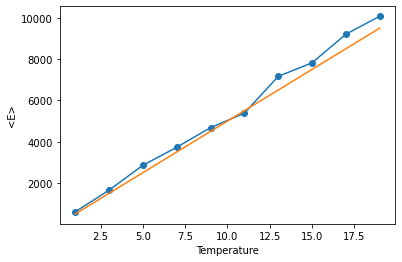

In [9]:
b = np.arange(1,20,0.1)
plt.xlabel('Temperature')
plt.ylabel('<E>')
plt.plot(temp,y,'-o')
plt.plot(temp, 0.5*1000*temp)


In [10]:
def aveE(b,N):
    states = np.ones(N)
    for t in range(N*100):
        i=random.randint(0,N-1)
        dE = 0
        dn = 0
        if states[i] == 1 :
            if random.random() > (1/2) :
                dE = 2*states[i]+1
                dn = 1
        
        elif random.random() > (1/2) :
            dE = 2*states[i]+1
            dn = 1
        else :
            dE = -2*states[i] + 1
            dn = -1
        
        if dE > 0 :
            if random.random() < np.exp(-b*dE):
                states[i] += dn
                states[i] = -1*states[i]
                
        
        elif dE <= 0 :
            states[i] += dn
            states[i] = -1*states[i]
            
    
    return states

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

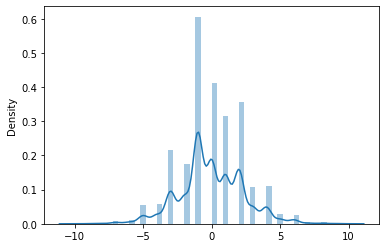

In [11]:
temp = np.arange(1,20,2)
y = [aveE(1/t,1000) for t in temp]
sns.distplot(y)